# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

In [4]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [5]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/CS445/proj1/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

In [6]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
# %matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image 2 (our low frequency image)')

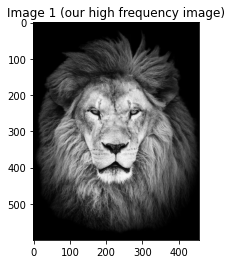

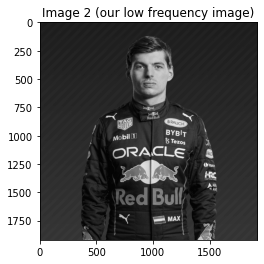

In [7]:
im1_file = datadir + 'lion.jpg'
im2_file = datadir + 'Max.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

d = plt.figure()
plt.imshow(im1, cmap = 'gray')
plt.title("Image 1 (our high frequency image)")
p = plt.figure()
plt.imshow(im2, cmap = 'gray')
plt.title("Image 2 (our low frequency image)")

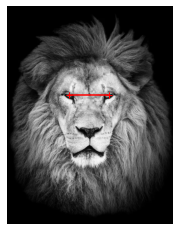

In [12]:
pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[170, 245], [280, 245]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

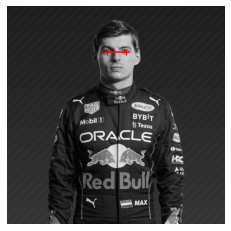

In [18]:
pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[880,400], [1050,400]]) # uncomment if entering [x, y] pts manually
plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [19]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [20]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

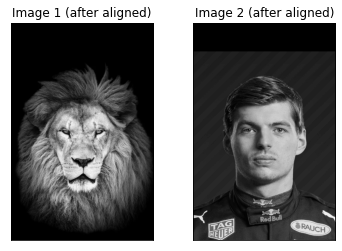

In [21]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1 (after aligned)'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2 (after aligned)'), axes[1].set_xticks([]), axes[1].set_yticks([]);

In [22]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
    '''  

    # your code goes here 

    # we first grayscaled images if these are RGB images
    if im1.shape == 3:
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) /255
    if im2.shape == 3:
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) /255
        
    # create a 2D Gaussian kernel:
    low_ksize = np.int(np.ceil(sigma_low) * 6 + 1)
    low_fil = cv2.getGaussianKernel(low_ksize, sigma_low) # 1D kernel
    low_fil = low_fil*np.transpose(low_fil) # 2D kernel by outer product

    high_ksize = np.int(np.ceil(sigma_high) * 6 + 1)
    high_fil = cv2.getGaussianKernel(high_ksize, sigma_high) # 1D kernel
    high_fil = high_fil*np.transpose(high_fil) # 2D kernel by outer product

    
    # Using cv2 to smooth out the image with standard 2D Gaussian filter
    low_pass_image = cv2.filter2D(im1, -1, low_fil)
    
    # Using cv2 to filter the image with (impulse filter minus the Gaussian filter)
    high_pass_image = cv2.filter2D(im2, -1, high_fil)
    high_pass_image = im2 - high_pass_image

    #filtered images
    im1_low_pass = plt.figure()
    plt.imshow(low_pass_image, cmap = 'gray')
    plt.title("Filtered Low Pass Image")
    im2_high_pass = plt.figure()
    plt.imshow(high_pass_image, cmap = 'gray')
    plt.title("Filtered High Pass Image")
    
    #hybrid image
    hybrid_image = (low_pass_image + high_pass_image)
    hybrid = plt.figure()
    plt.imshow(hybrid_image, cmap = 'gray')
    plt.title("Hybrid Image")
    
    #fft images
    im1_fft = plt.figure("Image 1 FFT")
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im1)))))
    plt.title("Fast Fourier Transform of Image 1")
    
    im2_fft = plt.figure("Image 2 FFT")
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(im2)))))
    plt.title("Fast Fourier Transform of Image 2")
    
    im1_filtered = plt.figure("Image 1 Filtered Low Pass Image FFT")
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_pass_image)))))
    plt.title("Fast Fourier Transform of the Filtered Low Pass Image")
    
    im2_filtered = plt.figure("Image 2 Filtered High Pass Image FFT")
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_pass_image)))))
    plt.title("Fast Fourier Transform of the Filtered High Pass Image")
    
    hybridim_fft = plt.figure("Hyrid Image FFT")
    plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid_image)))))
    plt.title("Fast Fourier Transform of the Hybrid Image")

    return hybrid_image 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecat

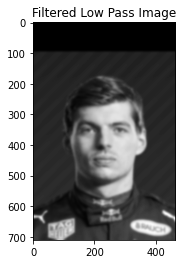

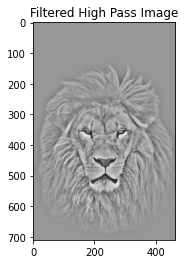

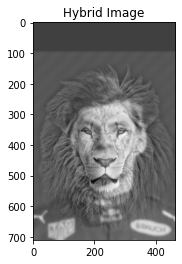

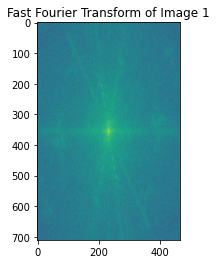

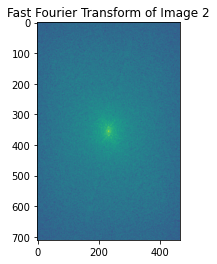

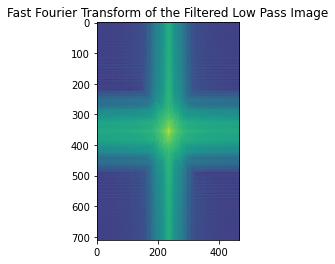

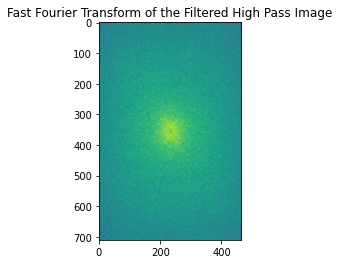

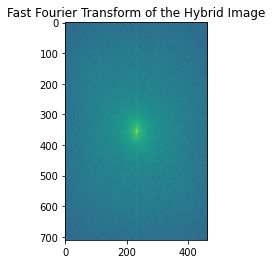

In [23]:
sigma_low = 3 # choose parameters that work for your images
sigma_high = 10

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)

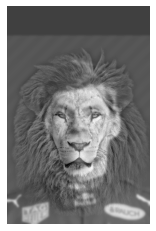

In [24]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W
#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

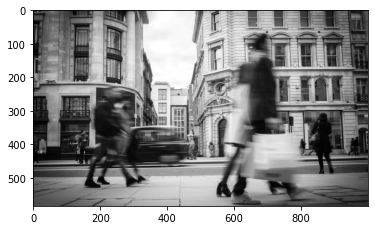

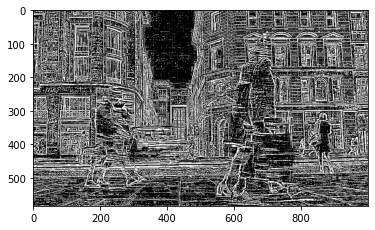

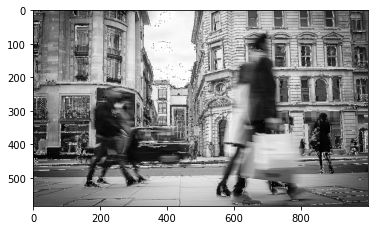

In [25]:
im_file = datadir + 'motionblur.jpg'

im = cv2.imread(im_file)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.figure("Original Gray for Contrast Enhancement")
plt.imshow(im_gray, cmap = 'gray')

fil = cv2.GaussianBlur(im_gray, (11, 11), cv2.BORDER_REPLICATE)
high_freq = im_gray - fil
plt.figure("Laplacian Filter")
plt.imshow(high_freq, cmap = "gray")
contrast_enhancement = im_gray + high_freq * 2
plt.figure("Contrast Enhancement Image")
plt.imshow(contrast_enhancement, cmap = 'gray')


#### Color enhancement 

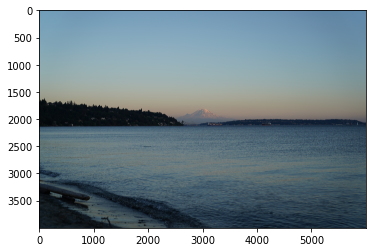

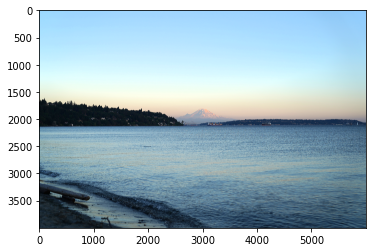

In [26]:
im_file = datadir + 'mountain.JPG'
im = cv2.imread(im_file)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure("Original Color Image for Color Enhancement")
plt.imshow(im)

im_HSV = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

im_V = im_HSV[:,:,2] * 1.5
im_V[im_V>255] = 255
im_HSV[:,:,2] = im_V

plt.figure("Color Enhancement Image")
plt.imshow(cv2.cvtColor(im_HSV, cv2.COLOR_HSV2RGB))

#### Color shift

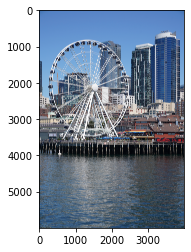

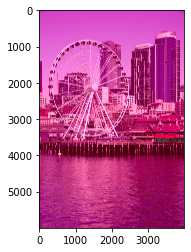

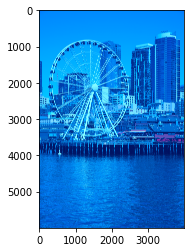

In [27]:
im_file = datadir + 'wheel.JPG'
im = cv2.imread(im_file)
red_shift = cv2.imread(im_file)
yellow_shift = cv2.imread(im_file)

# Converting to LAB Color Space
im_lab = cv2.cvtColor(im, cv2.COLOR_BGR2Lab)
red_shift =  cv2.cvtColor(red_shift, cv2.COLOR_BGR2Lab)
yellow_shift = cv2.cvtColor(yellow_shift, cv2.COLOR_BGR2Lab)

# Shifting
red_shift[:, :, 1] = im_lab[:, :, 1] * 1.5
yellow_shift[:, :, 2] = im_lab[:, :, 2] * 0.5


# Displaying the images
plt.figure("Original Image for Color Shift")
plt.imshow(cv2.cvtColor(im_lab, cv2.COLOR_Lab2RGB))
plt.figure("Red Shift (more) Image")
plt.imshow(cv2.cvtColor(red_shift, cv2.COLOR_Lab2RGB))
plt.figure("Yellow Shift (less) Image")
plt.imshow(cv2.cvtColor(yellow_shift, cv2.COLOR_Lab2RGB))
